In [78]:
#import library
import numpy as np
import pandas as pd

In [79]:
# import dataset

dt = pd.read_csv('titanic.csv')
dt.tail()

PassengerId  Survived  Pclass                                      Name  \
886          887         0       2                     Montvila, Rev. Juozas   
887          888         1       1              Graham, Miss. Margaret Edith   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   
889          890         1       1                     Behr, Mr. Karl Howell   
890          891         0       3                       Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch      Ticket   Fare Embarked  
886    male  27.0      0      0      211536  13.00        S  
887  female  19.0      0      0      112053  30.00        S  
888  female   NaN      1      2  W./C. 6607  23.45        S  
889    male  26.0      0      0      111369  30.00        C  
890    male  32.0      0      0      370376   7.75        Q

In [80]:
dt.shape

(891, 11)

In [81]:
# Xóa các cột
df=dt.drop(['PassengerId', 'Name', 'Ticket'],axis=1)
df.tail()

Survived  Pclass     Sex   Age  SibSp  Parch   Fare Embarked
886         0       2    male  27.0      0      0  13.00        S
887         1       1  female  19.0      0      0  30.00        S
888         0       3  female   NaN      1      2  23.45        S
889         1       1    male  26.0      0      0  30.00        C
890         0       3    male  32.0      0      0   7.75        Q

In [82]:
# Kiểm tra null
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

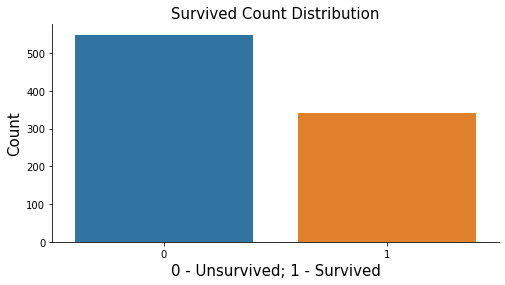

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig, ax = plt.subplots()
fig.set_size_inches(8, 4)
sns.countplot(x = 'Survived', data = df)
ax.set_xlabel('0 - Unsurvived; 1 - Survived', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Survived Count Distribution', fontsize=15)
sns.despine()

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

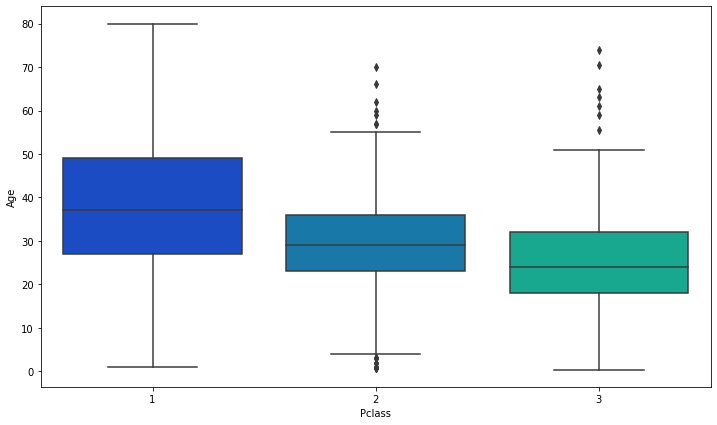

In [84]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=df,palette='winter')

In [85]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [86]:
df['Age'] = df[['Age','Pclass']].apply(impute_age,axis=1)

In [87]:
df['Embarked'] = df['Embarked'].fillna('S')
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [88]:
df.dtypes # datatypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [89]:
#import LabelEncoder để chuyển giá trị chuỗi thành giá trị số 
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

features = ["Sex", "Embarked"]

for col in features:
    df[col] = le.fit_transform(df[col])

df.tail()

Survived  Pclass  Sex   Age  SibSp  Parch   Fare  Embarked
886         0       2    1  27.0      0      0  13.00         2
887         1       1    0  19.0      0      0  30.00         2
888         0       3    0  24.0      1      2  23.45         2
889         1       1    1  26.0      0      0  30.00         0
890         0       3    1  32.0      0      0   7.75         1

In [90]:
X=df.drop(['Survived'],axis=1)
y=df['Survived']

X.tail()

Pclass  Sex   Age  SibSp  Parch   Fare  Embarked
886       2    1  27.0      0      0  13.00         2
887       1    0  19.0      0      0  30.00         2
888       3    0  24.0      1      2  23.45         2
889       1    1  26.0      0      0  30.00         0
890       3    1  32.0      0      0   7.75         1

In [91]:
# spiliting the dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.35,random_state= 10)

In [92]:
# Decision Tree Classifier with criterion gini index
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion='gini', random_state=0)
model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [93]:
import joblib
filename = "Completed_model11.joblib"
joblib.dump(model, filename)

['Completed_model11.joblib']

In [94]:
from sklearn.metrics import accuracy_score
y_pred_gini = model.predict(X_test)

print(f'Model accuracy score with criterion gini index: {accuracy_score(y_test, y_pred_gini)* 100:.2f}%')

Model accuracy score with criterion gini index: 0.7692


In [95]:
from sklearn.metrics import mean_squared_error

print('MSE:{}'.round(mean_squared_error(y_test,y_pred_gini)),2)
print('RMSE:{}'.round(np.sqrt(mean_squared_error(y_test,y_pred_gini))),2)

model.predict([[3, 1, 32, 0, 0, 7.75, 1]])

MSE:0.23076923076923078
RMSE:0.4803844614152614


array([0], dtype=int64)

In [96]:
#Evaluation using Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred_gini)

array([[164,  38],
       [ 34,  76]], dtype=int64)

In [97]:
#Evaluation using Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_gini))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82       202
           1       0.67      0.69      0.68       110

    accuracy                           0.77       312
   macro avg       0.75      0.75      0.75       312
weighted avg       0.77      0.77      0.77       312



In [98]:
#Import modules for Visualizing Decision trees
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

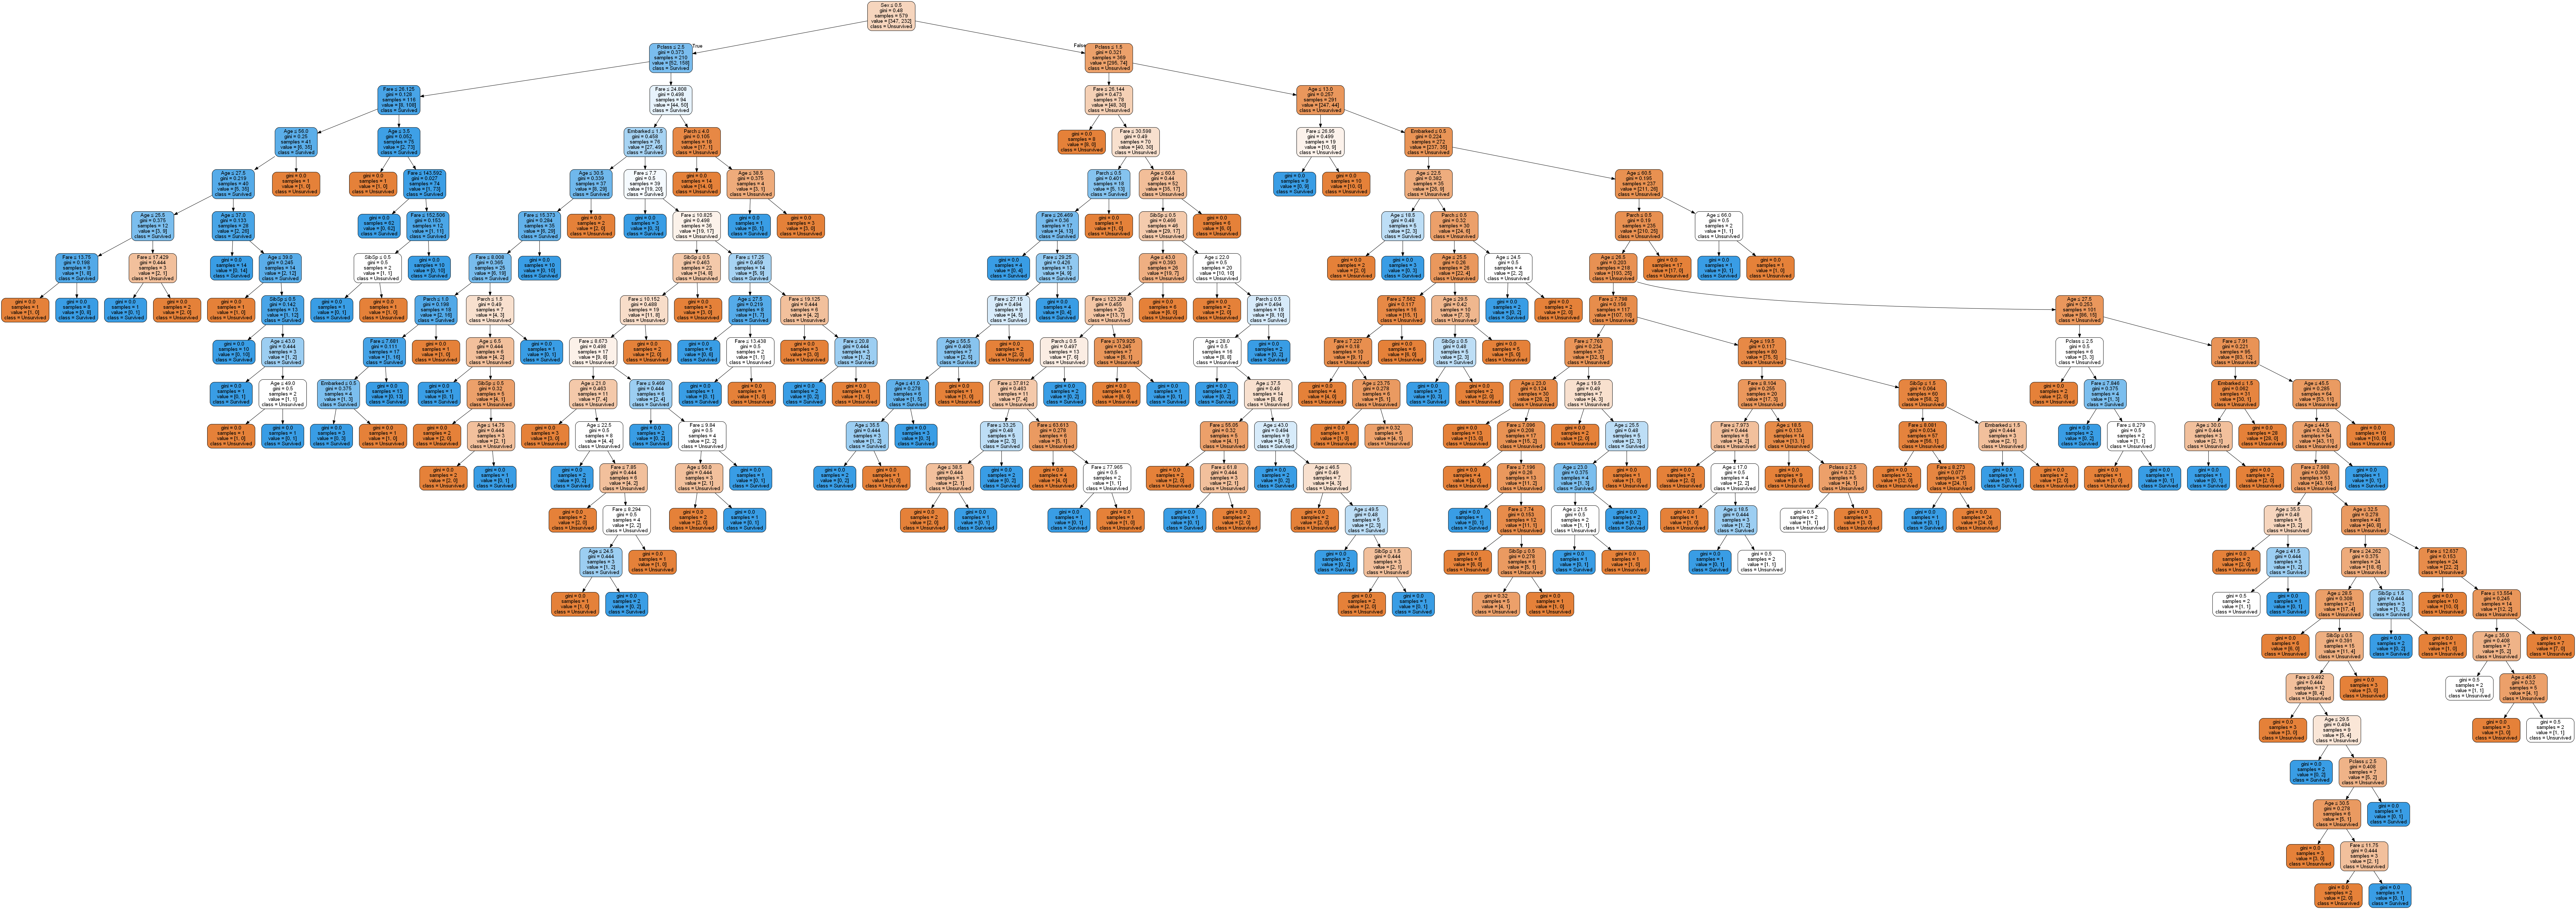

In [99]:
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,filled=True, rounded=True,special_characters=True,feature_names = X.columns,class_names=['Unsurvived','Survived'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('titanic.png')
Image(graph.create_png())

In [100]:
# Decision Tree Classifier with criterion entropy
# Create Decision Tree classifer object
model1 = DecisionTreeClassifier(criterion="entropy", random_state=0)

# Train Decision Tree Classifer
model1.fit(X_train,y_train)

#Predict the response for test dataset
y_pred_entropy = model1.predict(X_test)

In [101]:
# Model Accuracy
print(f'Model accuracy score with criterion entropy index: {accuracy_score(y_test, y_pred_entropy)* 100:.2f}%')

print('MSE:{}'.format(mean_squared_error(y_test,y_pred_entropy)))
print('RMSE:{}'.format(np.sqrt(mean_squared_error(y_test,y_pred_entropy))))

model.predict([[3, 1, 32, 0, 0, 7.75, 1]])

Accuracy: 78.52564102564102
MSE:0.21474358974358973
RMSE:0.46340434799814917


array([0], dtype=int64)

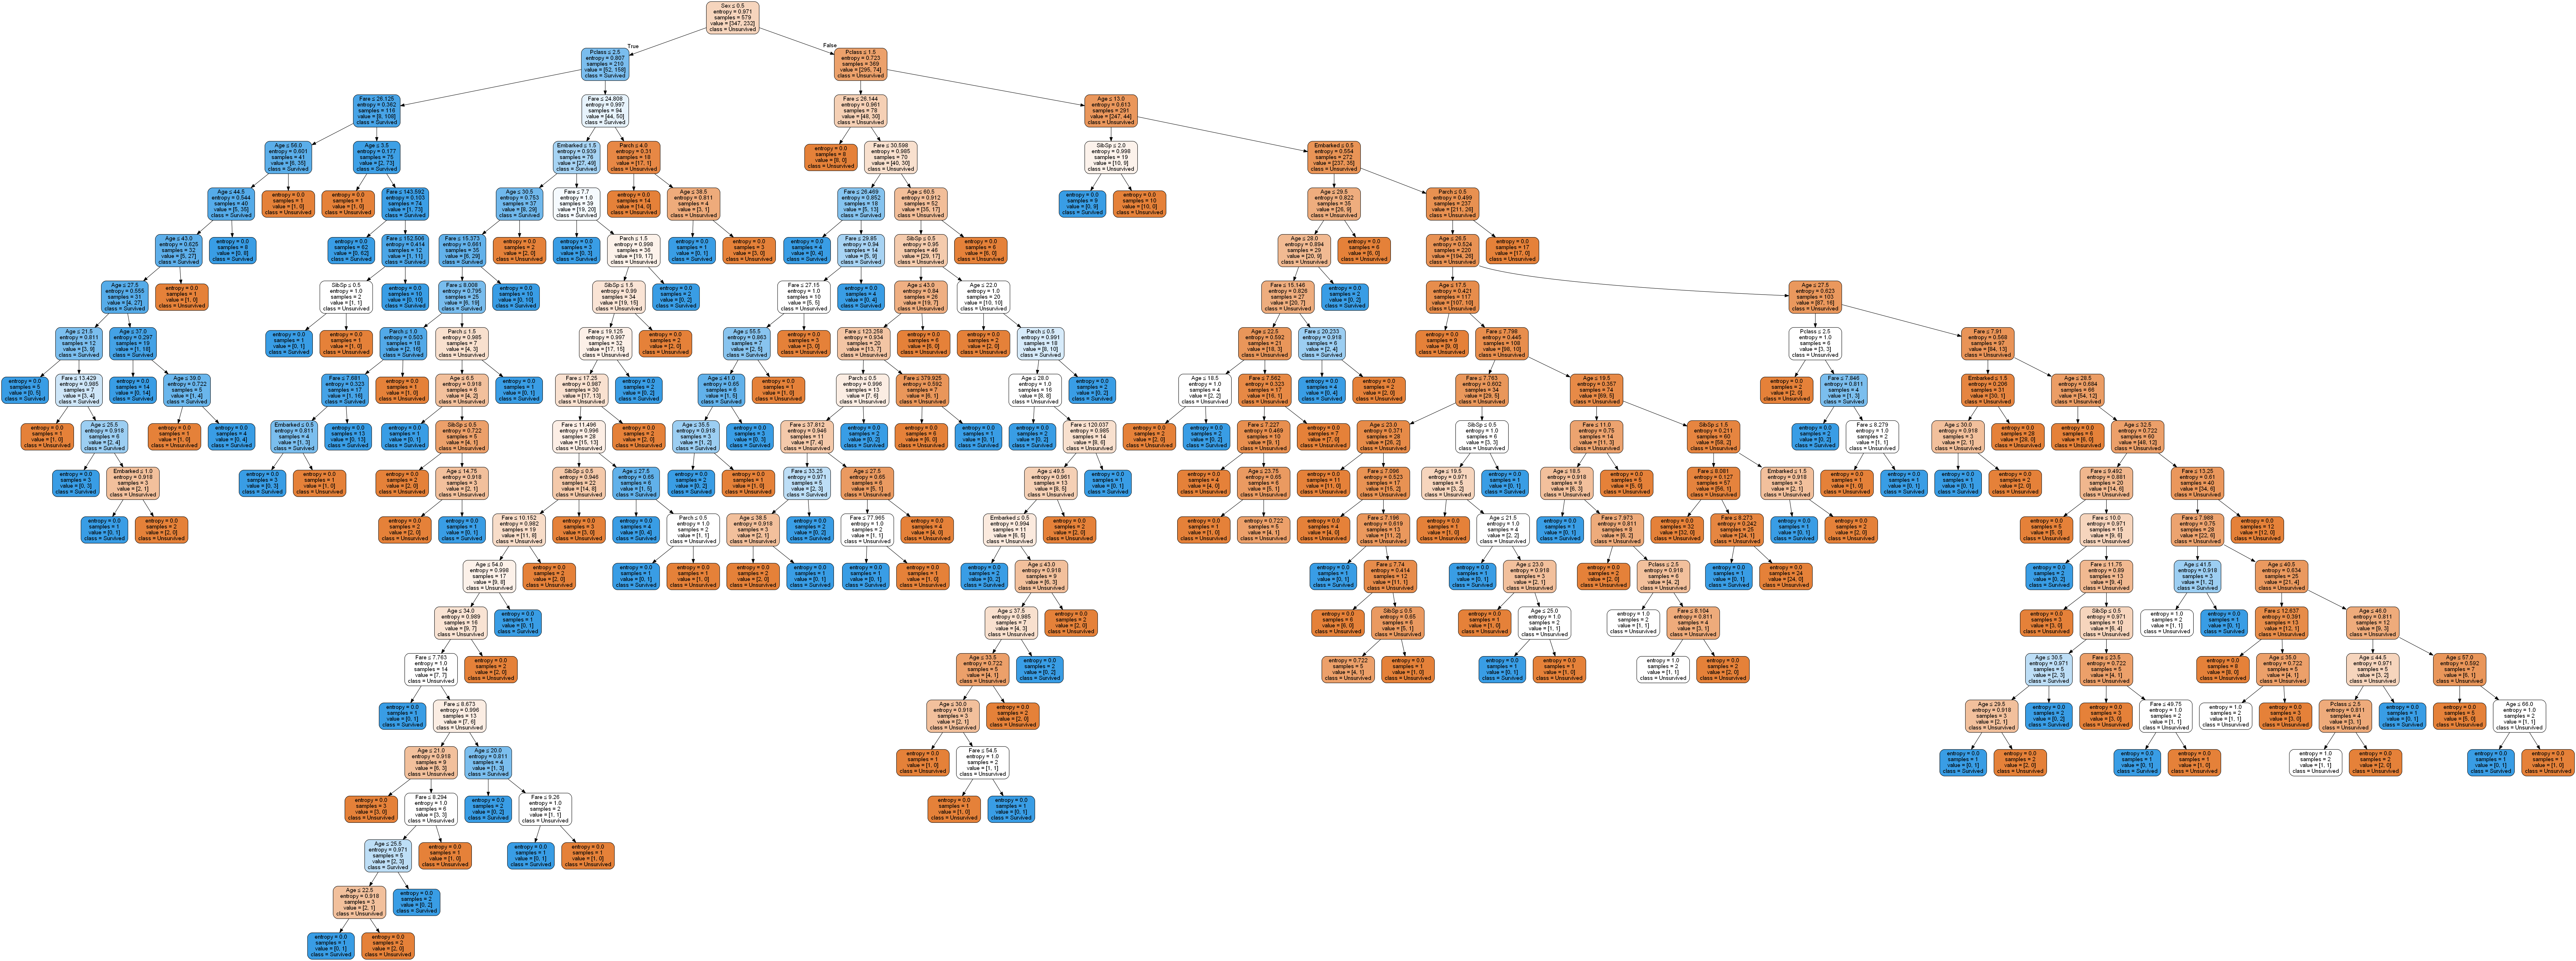

In [102]:
dot_data = StringIO()
export_graphviz(model1, out_file=dot_data,filled=True, rounded=True,special_characters=True, feature_names = X.columns,class_names=['Unsurvived','Survived'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('titanic1.png')
Image(graph.create_png())